**Using Content Based Filtering to recommend similar items by:**
1. Creating user-feature matrix
1. Creating item-feature matrix
1. Measuring similraity using dot product as metric
1. Recommending top-k similar items 


**Second Approach**

Perform dimensionality reduction using PCA on user_feature and item_feature matrices

**I used first 20000 rows from transactions record**

**Limited customers to customers who bought at least two items**


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io

In [2]:
df = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv', chunksize=100000)
articles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')
users = next(df)
df = users.merge(articles, on='article_id')
df = df[['t_dat', 'customer_id', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc']]

feature_subset = ['product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']

In [3]:
df.shape

(100000, 16)

In [4]:
df.head()

,t_dat,customer_id,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [5]:
#Choose features to build feature space
features = feature_subset
df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [7]:

user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.000000,0.0,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.033333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.000000,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.060000,0.0,0.000000,0.0,0.000000,0.000000,0.0
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.025000,0.000000,0.0
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.000000,0.0,0.0,0.050000,0.000000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.000000,0.0,0.0,0.000000,0.050000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.000000,0.0,0.0,0.000000,0.040000,0.060000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.020000,0.0,0.000000,0.000000,0.0
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.000000,0.0,0.0,0.000000,0.020000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.020000,0.0,0.000000,0.0,0.080000,0.000000,0.0


In [8]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
article_id,,,,,,,,,,,,,,,,,,,,,
663713001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
541518023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
505221004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685687003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
685687004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661351001,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637028001,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623873001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,663713001,541518023,505221004,685687003,685687004,685687001,505221001,688873012,501323011,598859003,...,327821026,661929001,466381012,714429001,641228003,661351001,637028001,623873001,548837002,538977001
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.166667,0.100000,0.233333,0.166667,0.20,0.200000,0.233333,0.200000,0.233333,0.166667,...,0.033333,0.233333,0.133333,0.200,0.366667,0.233333,0.233333,0.033333,0.166667,0.100000
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.800000,0.800000,0.050000,0.150000,0.15,0.150000,0.000000,0.150000,0.350000,0.250000,...,0.000000,0.000000,0.350000,0.100,0.150000,0.050000,0.000000,0.150000,0.050000,0.050000
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.100000,0.100000,0.520000,0.600000,0.58,0.580000,0.480000,0.220000,0.160000,0.160000,...,0.000000,0.180000,0.040000,0.100,0.080000,0.100000,0.180000,0.040000,0.080000,0.260000
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.275000,0.125000,0.325000,0.150000,0.30,0.250000,0.325000,0.150000,0.275000,0.225000,...,0.000000,0.325000,0.225000,0.225,0.300000,0.150000,0.325000,0.075000,0.150000,0.175000
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.150000,0.200000,0.050000,0.200000,0.20,0.200000,0.050000,0.300000,0.200000,0.200000,...,0.000000,0.100000,0.350000,0.150,0.250000,0.150000,0.200000,0.150000,0.100000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.450000,0.150000,0.050000,0.350000,0.45,0.450000,0.050000,0.350000,0.600000,0.400000,...,0.100000,0.100000,0.400000,0.050,0.050000,0.000000,0.100000,0.050000,0.000000,0.050000
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.160000,0.060000,0.320000,0.120000,0.18,0.220000,0.320000,0.100000,0.240000,0.200000,...,0.100000,0.380000,0.200000,0.200,0.220000,0.180000,0.300000,0.040000,0.160000,0.120000
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.760000,0.500000,0.000000,0.180000,0.28,0.280000,0.000000,0.120000,0.400000,0.440000,...,0.020000,0.000000,0.340000,0.080,0.080000,0.000000,0.000000,0.080000,0.000000,0.000000


In [10]:
# normalized_user_feature.to_csv('normalized_user_feature.csv')
# item_feature.to_csv('item_feature.csv')
# scores.to_csv('scores.csv')

In [11]:
def get_rcmnd(customer_id, scores):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [12]:
def plot_prev(prev_items):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [13]:
def plot_rcmnd(rcmnds):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=100)
pca.fit(normalized_user_feature)
pca.explained_variance_ratio_.sum()

0.9583088237528183

In [16]:
user_feature_pca = pd.DataFrame(pca.transform(normalized_user_feature), columns=['component_{}'.format(i) for i in range(1, 101)]).set_index(normalized_user_feature.index)
item_feature_pca = pd.DataFrame(pca.transform(item_feature), columns=['component_{}'.format(i) for i in range(1, 101)]).set_index(item_feature.index)

In [17]:
scores_pca = user_feature_pca.dot(item_feature_pca.T)

In [18]:
# user_feature_pca.to_csv('user_feature_pca.csv')
# item_feature_pca.to_csv('item_feature_pca.csv')
# scores_pca.to_csv('scores_pca.csv')

In [19]:
k = 6
customer_id = scores.index[1]
rcmnds, prev_items = get_rcmnd(customer_id, scores)
rcmnds_pca, prev_items = get_rcmnd(customer_id, scores_pca)
rcmnds = rcmnds.index.values[:k]
rcmnds_pca = rcmnds_pca.index.values[:k]
path = "../input/h-and-m-personalized-fashion-recommendations/images"

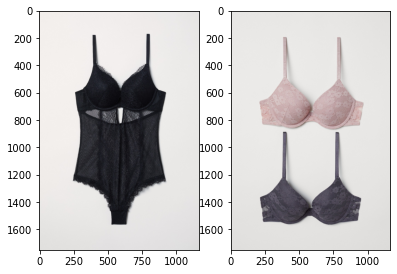

In [20]:
plot_prev(prev_items)

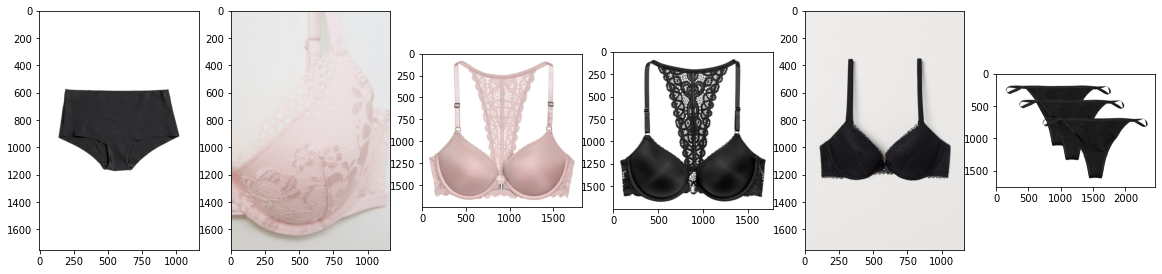

In [21]:
plot_rcmnd(rcmnds)

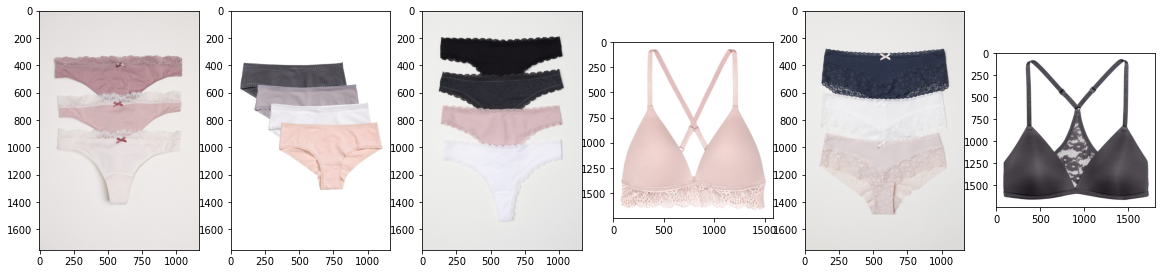

In [22]:
plot_rcmnd(rcmnds_pca)